<a href="https://colab.research.google.com/github/Tkaheva/MO/blob/main/homework_practice_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Лабораторная 2.1

Есть два набора точек - *x_hw* и *y_hw*. В рамках домашней работы нужно
* визуализировать набор точек
* найти коэффициенты регрессии $w_0, w_1$ по шагам, как на семинаре
* посчитать предсказание в виде $\hat{y} = w_0 + w_1x$ и визуализировать его вместе с точками *x_hw* и *y_hw*

In [2]:
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

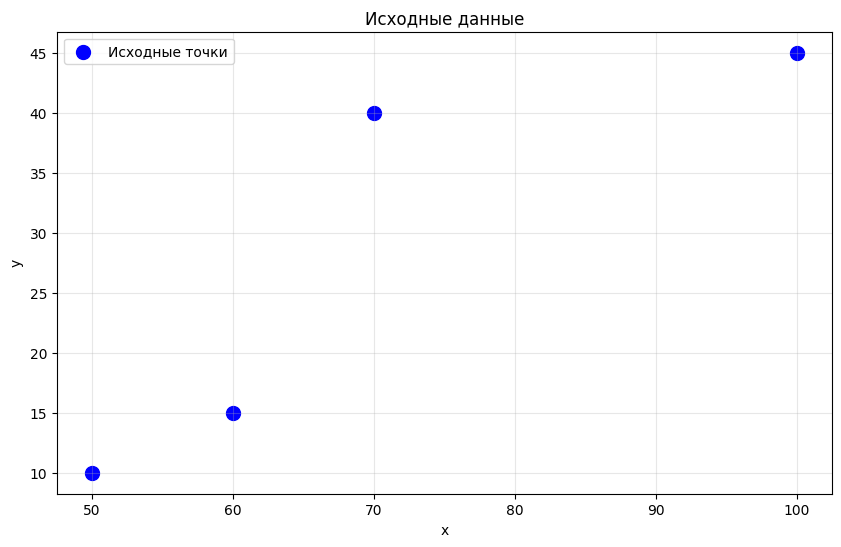

Коэффициенты: w0 = -22.5000, w1 = 0.7143


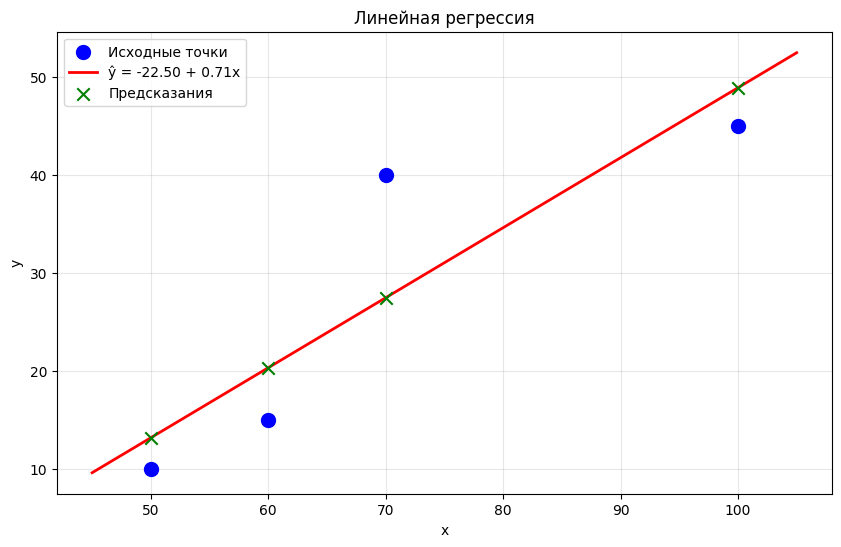

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# 1. Визуализация исходных данных
plt.figure(figsize=(10, 6))
plt.scatter(x_hw, y_hw, color='blue', s=100, label='Исходные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Исходные данные')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

# 2. Расчет коэффициентов
x = np.array(x_hw)
y = np.array(y_hw)

x_mean = np.mean(x)
y_mean = np.mean(y)
xy_mean = np.mean(x * y)
x2_mean = np.mean(x**2)

w1 = (xy_mean - x_mean * y_mean) / (x2_mean - x_mean**2)
w0 = y_mean - w1 * x_mean

print(f"Коэффициенты: w0 = {w0:.4f}, w1 = {w1:.4f}")

# 3. Предсказания и визуализация
y_pred = w0 + w1 * x

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', s=100, label='Исходные точки', zorder=5)

x_line = np.linspace(min(x)-5, max(x)+5, 100)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'ŷ = {w0:.2f} + {w1:.2f}x')

plt.scatter(x, y_pred, color='green', s=80, marker='x', label='Предсказания', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

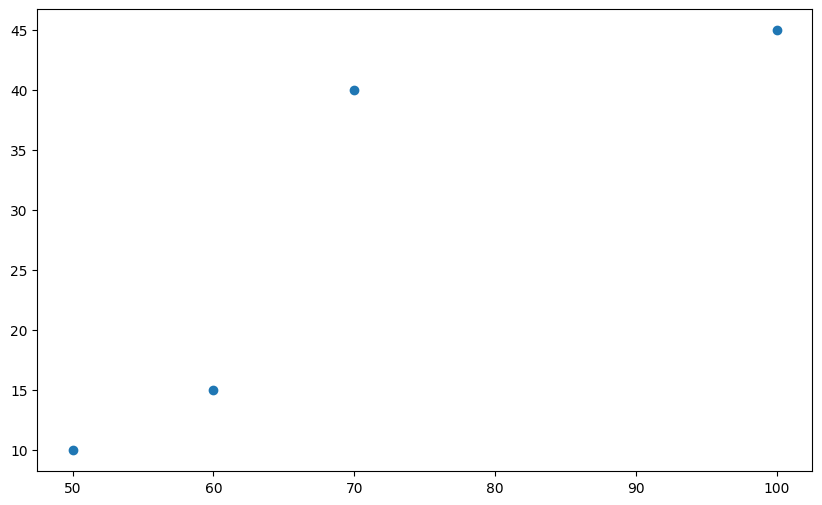

w0 = -2445250, w1 = -182739610


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.figure(figsize = (10, 6))
plt.scatter(x_hw, y_hw)
#plt.plot(x_hw, y_hw)
plt.show()

#Find coef regression
import numpy as np

X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
Y = np.array([[10],[15],[40],[45]])
x_t_x = X.T.dot(X)
x_inv = np.invert(x_t_x)
x_t_y = X.T.dot(Y)
coef = x_inv.dot(x_t_y)
print(f'w0 = {coef[0][0]}, w1 = {coef[1][0]}')

#pred
#y^=w0+w1x
w1_x = coef[1][0] * X
y = coef[0][0] + w1_x




w0 = -22.5000, w1 = 0.7143


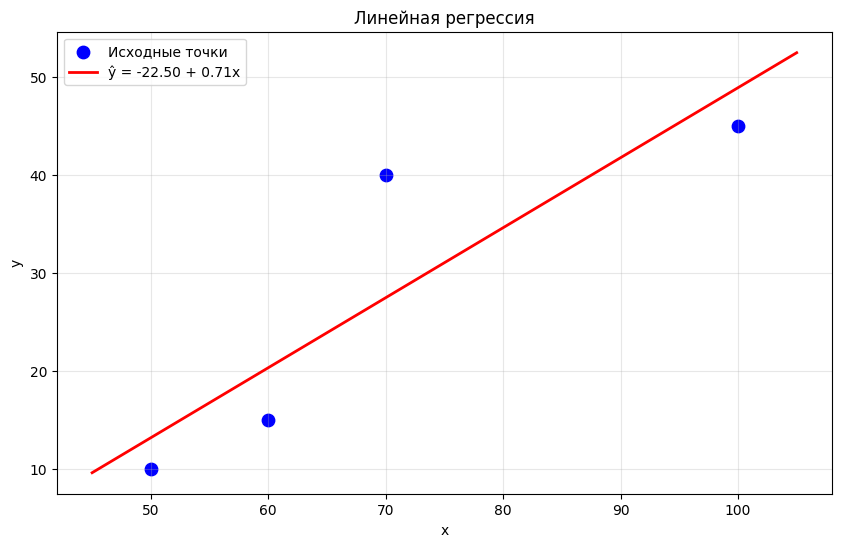


Предсказания:
x = 50, y = 10, ŷ = 13.21
x = 60, y = 15, ŷ = 20.36
x = 70, y = 40, ŷ = 27.50
x = 100, y = 45, ŷ = 48.93

R² = 0.7722


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Данные
x_hw = [50, 60, 70, 100]
y_hw = [10, 15, 40, 45]

# Визуализация исходных точек
plt.figure(figsize=(10, 6))
plt.scatter(x_hw, y_hw, color='blue', s=80, label='Исходные точки')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия')
plt.grid(True, alpha=0.3)

# Вычисление коэффициентов регрессии
X = np.array([[1, 50],[1, 60],[1, 70],[1, 100]])
Y = np.array([[10],[15],[40],[45]])

x_t_x = X.T.dot(X)
x_inv = np.linalg.inv(x_t_x)  # Исправил np.invert на np.linalg.inv
x_t_y = X.T.dot(Y)
coef = x_inv.dot(x_t_y)

w0 = coef[0][0]
w1 = coef[1][0]

print(f'w0 = {w0:.4f}, w1 = {w1:.4f}')

# Построение линии регрессии
x_line = np.linspace(min(x_hw)-5, max(x_hw)+5, 100)
y_line = w0 + w1 * x_line
plt.plot(x_line, y_line, color='red', linewidth=2, label=f'ŷ = {w0:.2f} + {w1:.2f}x')

plt.legend()
plt.show()

# Предсказания для исходных точек
y_pred = w0 + w1 * np.array(x_hw)
print("\nПредсказания:")
for i in range(len(x_hw)):
    print(f"x = {x_hw[i]}, y = {y_hw[i]}, ŷ = {y_pred[i]:.2f}")

# Вычисление R²
ss_res = np.sum((np.array(y_hw) - y_pred)**2)
ss_tot = np.sum((np.array(y_hw) - np.mean(y_hw))**2)
r2 = 1 - (ss_res / ss_tot)
print(f"\nR² = {r2:.4f}")